In [2]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

Matplotlib is building the font cache; this may take a moment.


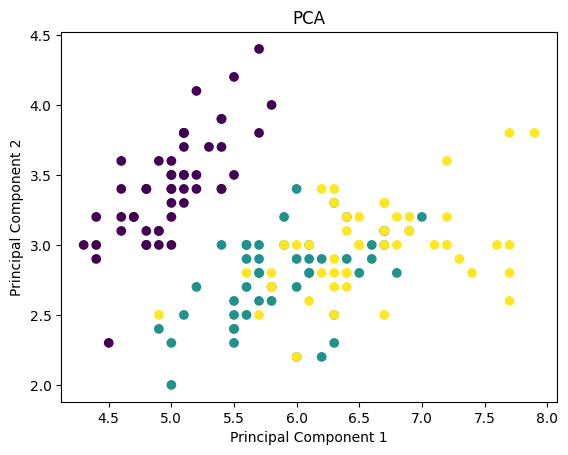

In [3]:
# Plot the transformed data
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

In [4]:
# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the data to the PCA model
X_pca = pca.fit_transform(X)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.92461872 0.05306648]


In [5]:
pca.get_covariance()

array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

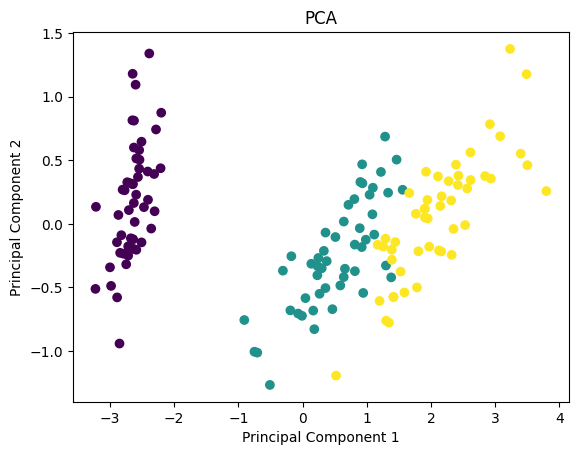

In [6]:
# Plot the transformed data
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
X=iris.data
# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++')

# Fit the data to the KMeans model
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_
print(centers)

[[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


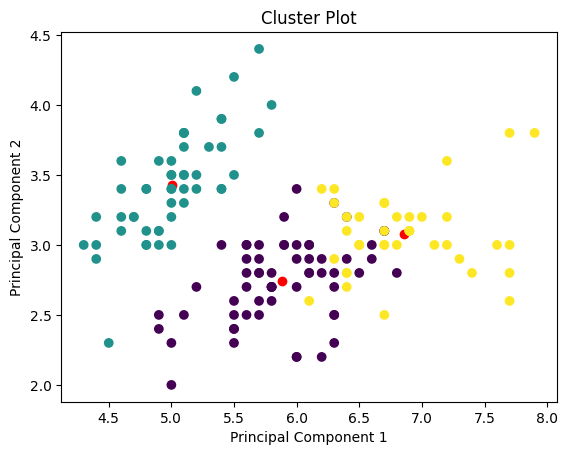

In [8]:
import matplotlib.pyplot as plt

plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='o')
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Plot')
plt.show()

# self training models

In [59]:
import numpy
from sklearn.base import BaseEstimator

class SelfLearningModel(BaseEstimator):
    def __init__(self, basemodel, max_iter = 200, prob_threshold = 0.8):
        self.model = basemodel
        self.max_iter = max_iter
        self.prob_threshold = prob_threshold
    def fit(self, X, y):
        unlabeledX = X[y==-1, :]
        labeledX = X[y!=-1, :]
        labeledy = y[y!=-1]
        self.model.fit(labeledX, labeledy)
        unlabeledy = self.predict(unlabeledX) 
        unlabeledprob = self.predict_proba(unlabeledX) 
        unlabeledy_old = []
        i=0
        while (len(unlabeledy_old) == 0 or numpy.any(unlabeledy!=unlabeledy_old)) and i < self.max_iter: 
            unlabeledy_old = numpy.copy(unlabeledy)
            uidx = numpy.where((unlabeledprob[:, 0] > self.prob_threshold) | (unlabeledprob[:, 1] > self.prob_threshold))[0]
            self.model.fit(numpy.vstack((labeledX, unlabeledX[uidx, :])), numpy.hstack((labeledy, unlabeledy_old[uidx])))
            unlabeledy = self.predict(unlabeledX) 
            unlabeledprob = self.predict_proba(unlabeledX) 
            i+=1

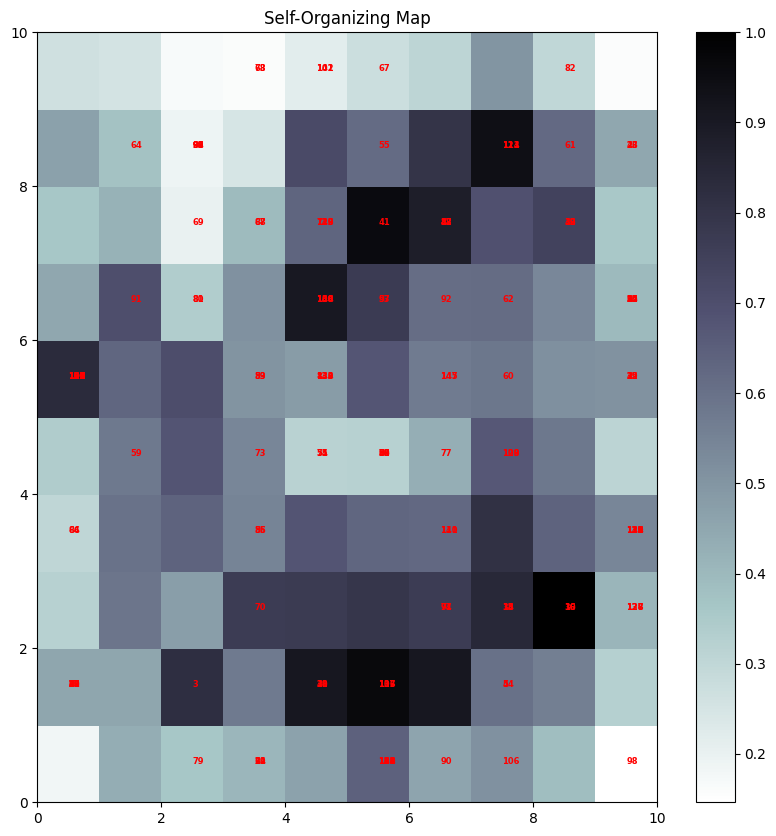

In [68]:
from minisom import MiniSom
import numpy as np

# Define the dimensions of the SOM grid
grid_width = 10
# Update the number of features in the SOM initialization
n_features = X.shape[1]

# Create a SOM object
som = MiniSom(grid_width, grid_height, n_features)

# Initialize the weights of the SOM
som.random_weights_init(X)

# Train the SOM
som.train_random(X, 100)

# Get the coordinates of the winning neuron for each data point
winning_neurons = np.array([som.winner(x) for x in X])

# Plot the SOM
plt.figure(figsize=(grid_width, grid_height))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

# Plot the data points on the SOM
for i, (x, w) in enumerate(zip(X, winning_neurons)):
    plt.text(w[0] + 0.5, w[1] + 0.5, str(i), color='red', fontdict={'weight': 'bold', 'size': 6})

plt.xlim([0, grid_width])
plt.ylim([0, grid_height])
plt.title('Self-Organizing Map')
plt.show()

In [75]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.example.com/'
response = requests.get(url).text


soup = BeautifulSoup(response, 'html.parser')
soup.get_text()




'\n\n\nExample Domain\n\n\n\n\n\n\n\nExample Domain\nThis domain is for use in illustrative examples in documents. You may use this\n    domain in literature without prior coordination or asking for permission.\nMore information...\n\n\n\n'

In [1]:
a=[1,2,3,4,5]
b=a
b[2]=26

In [2]:
b

[1, 2, 26, 4, 5]